In [44]:
import pandas as pd

df = pd.read_csv("Merged_Microplastic_Data.csv")

null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                                0
DOI                                       0
Sample_ID                                 0
Location                                149
Countries                               149
Source                                    0
Concentration                             6
Concentration_Units                       6
Approximate_Latitude                    155
Approximate_Longitude                   155
Sample_device_and_deployment_methods     21
Digestion                                21
Filtration                               21
Filter_Size                              21
Microplastic_Identification_Method       21
Spectral_Analysis                        21
Controls                                 21
dtype: int64


In [37]:
df = df.dropna(subset=['Concentration', 'Concentration_Units'])

In [52]:
df.columns

Index(['Unnamed: 0', 'DOI', 'Sample_ID', 'Location', 'Countries', 'Source',
       'Concentration', 'Concentration_Units', 'Approximate_Latitude',
       'Approximate_Longitude', 'Sample_device_and_deployment_methods',
       'Digestion', 'Filtration', 'Filter_Size',
       'Microplastic_Identification_Method', 'Spectral_Analysis', 'Controls'],
      dtype='object')

In [53]:
# For Concentration
missing_concentration = df[df['Concentration'].isnull()]
print("Rows with missing Concentration:")
print(missing_concentration)

# For Concentration_Units
missing_units = df[df['Concentration_Units'].isnull()]
print("Rows with missing Concentration_Units:")
[missing_units]

Rows with missing Concentration:
     Unnamed: 0                                DOI  \
4             4                 10.1039/c6ay01184e   
199         199    10.1016/j.scitotenv.2019.02.431   
200         200    10.1016/j.scitotenv.2019.02.431   
229         229          10.1016/j.cej.2020.128381   
235         235          10.1016/j.cej.2020.128381   
236         236          10.1016/j.cej.2020.128381   
237         237          10.1016/j.cej.2020.128381   
244         244  10.1016/j.chemosphere.2020.126612   
245         245  10.1016/j.chemosphere.2020.126612   
246         246  10.1016/j.chemosphere.2020.126612   
247         247  10.1016/j.chemosphere.2020.126612   
248         248  10.1016/j.chemosphere.2020.126612   
249         249  10.1016/j.chemosphere.2020.126612   
250         250  10.1016/j.chemosphere.2020.126612   
251         251  10.1016/j.chemosphere.2020.126612   
252         252  10.1016/j.chemosphere.2020.126612   
253         253  10.1016/j.chemosphere.2020.12661

[Empty DataFrame
 Columns: [Unnamed: 0, DOI, Sample_ID, Location, Countries, Source, Concentration, Concentration_Units, Approximate_Latitude, Approximate_Longitude, Sample_device_and_deployment_methods, Digestion, Filtration, Filter_Size, Microplastic_Identification_Method, Spectral_Analysis, Controls]
 Index: []]

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_3705/201943844.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Concentration_std'] = df_clean.apply(


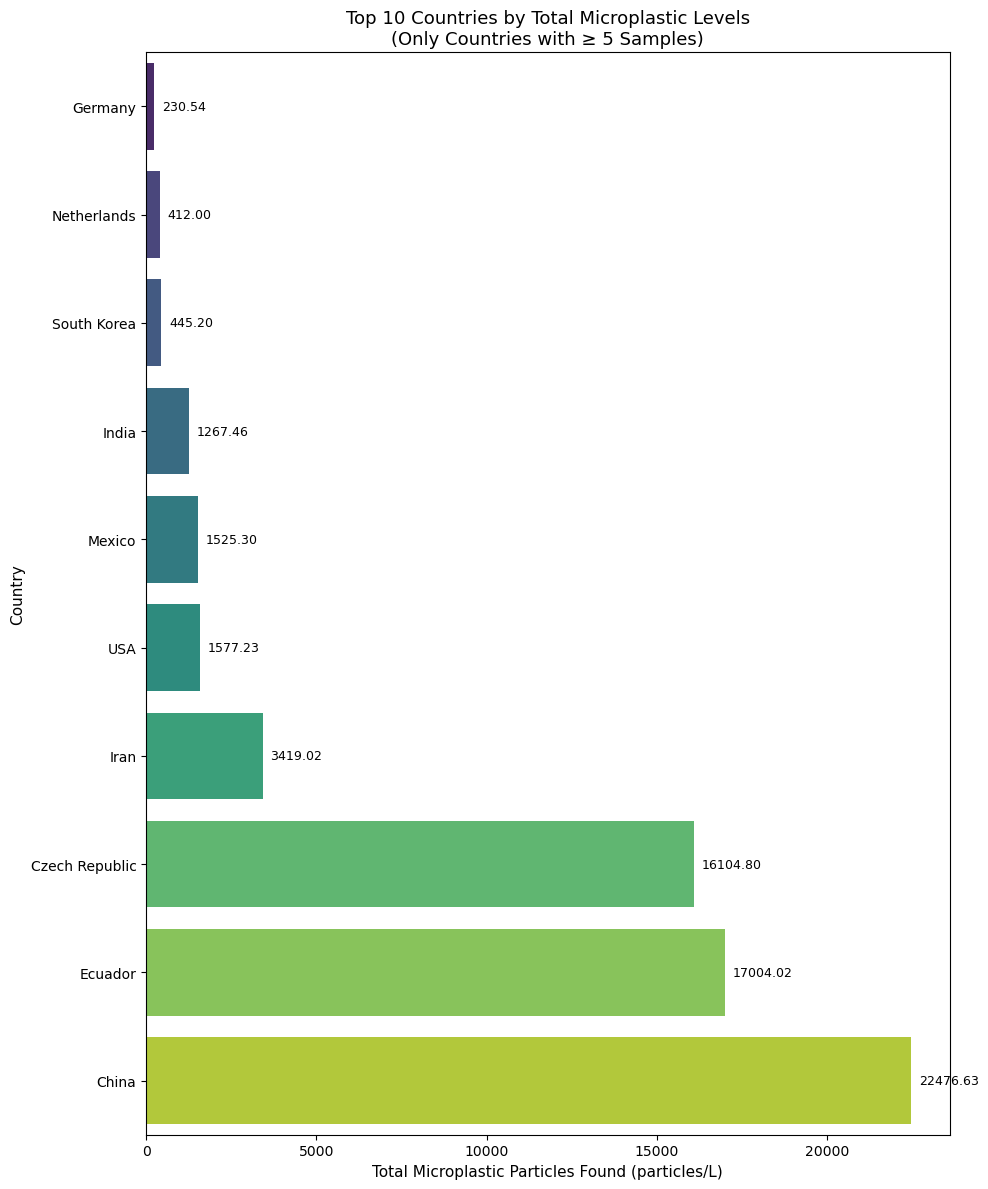

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and sum the total concentration
country_stats = df_clean.groupby('Countries').agg(
    total_std_concentration=('Concentration_std', 'sum'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 by total concentration
top10 = country_stats.sort_values(by='total_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='total_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='total_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Total Microplastic Particles Found (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Total Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labelsimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and calculate average concentration
country_stats = df_clean.groupby('Countries').agg(
    avg_std_concentration=('Concentration_std', 'mean'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 countries by average concentration
top10 = country_stats.sort_values(by='avg_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='avg_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='avg_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Average Microplastic Concentration (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Average Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labels
max_val = top10['avg_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()
max_val = top10['total_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_3705/2370062967.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Concentration_std'] = df_clean.apply(


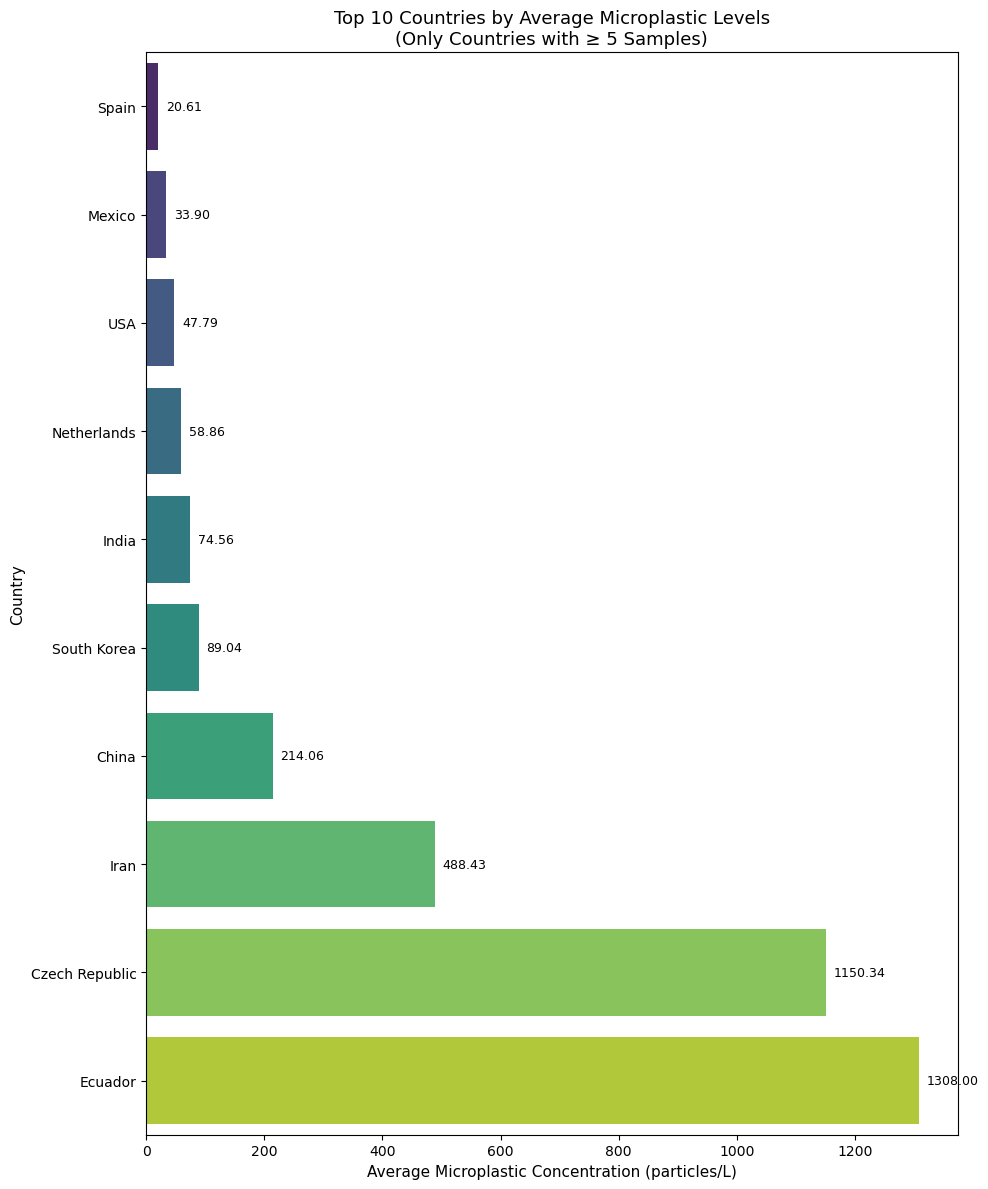

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and calculate average concentration
country_stats = df_clean.groupby('Countries').agg(
    avg_std_concentration=('Concentration_std', 'mean'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 countries by average concentration
top10 = country_stats.sort_values(by='avg_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='avg_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='avg_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Average Microplastic Concentration (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Average Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labels
max_val = top10['avg_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

### Count of Sample By Filtration Method  (USA vs Germany)

### Microplastic Concentration by Filtration Method

In [71]:
df.columns

Index(['Unnamed: 0', 'DOI', 'Sample_ID', 'Location', 'Countries', 'Source',
       'Concentration', 'Concentration_Units', 'Approximate_Latitude',
       'Approximate_Longitude', 'Sample_device_and_deployment_methods',
       'Digestion', 'Filtration', 'Filter_Size',
       'Microplastic_Identification_Method', 'Spectral_Analysis', 'Controls'],
      dtype='object')

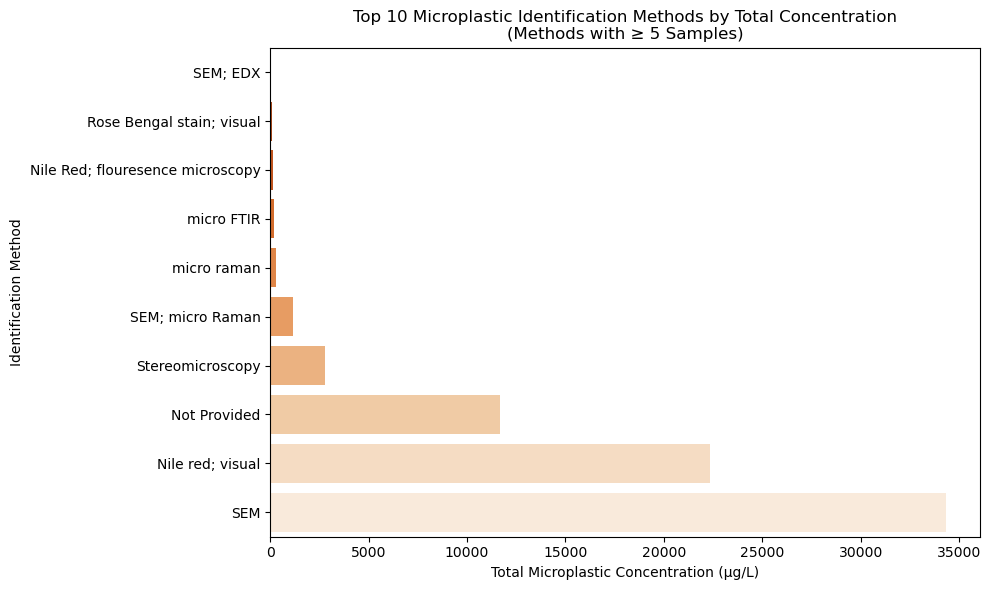

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Rename column for clarity
df = df.rename(columns={'Microplastic_Identification_Method': 'Identification_Method'})

# Group by method and calculate total concentration and sample count
method_stats = df.groupby('Identification_Method').agg(
    total_concentration=('Concentration', 'sum'),
    sample_count=('Concentration', 'count')
).reset_index()

# Keep only methods with at least 5 samples
method_stats = method_stats[method_stats['sample_count'] >= 5]

# Sort by total concentration and keep top 10
top10_methods = method_stats.sort_values(by='total_concentration', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_methods.sort_values(by='total_concentration'),  # sorted for clean display
    x='total_concentration',
    y='Identification_Method',
    palette='Oranges_r'
)
plt.xlabel("Total Microplastic Concentration (µg/L)")
plt.ylabel("Identification Method")
plt.title("Top 10 Microplastic Identification Methods by Total Concentration\n(Methods with ≥ 5 Samples)")
plt.tight_layout()
plt.show()

### Average Microplastic Concentration by Filtration Method  (USA vs Germany)

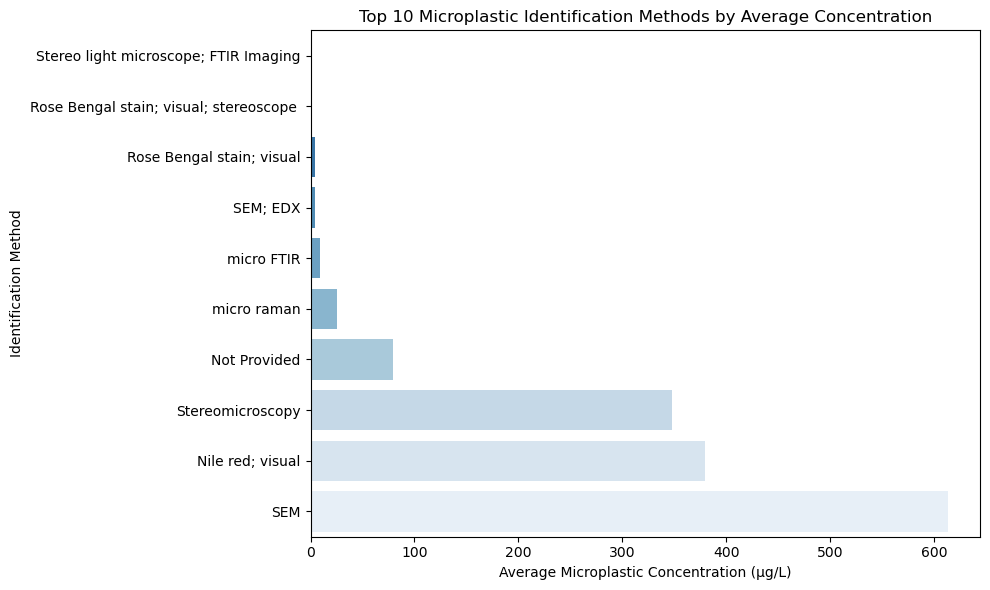

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Rename column for clarity if needed (optional)
df = df.rename(columns={'Microplastic_Identification_Method': 'Identification_Method'})

# Get top 10 most common methods
top_methods = df['Identification_Method'].value_counts().head(10).index
filtered_df = df[df['Identification_Method'].isin(top_methods)]

# Group and compute average concentration
mean_conc = filtered_df.groupby('Identification_Method')['Concentration'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_conc.values, y=mean_conc.index, palette='Blues_r')
plt.xlabel("Average Microplastic Concentration (µg/L)")
plt.ylabel("Identification Method")
plt.title("Top 10 Microplastic Identification Methods by Average Concentration")
plt.tight_layout()
plt.show()

### Filtration Method vs. Concentration

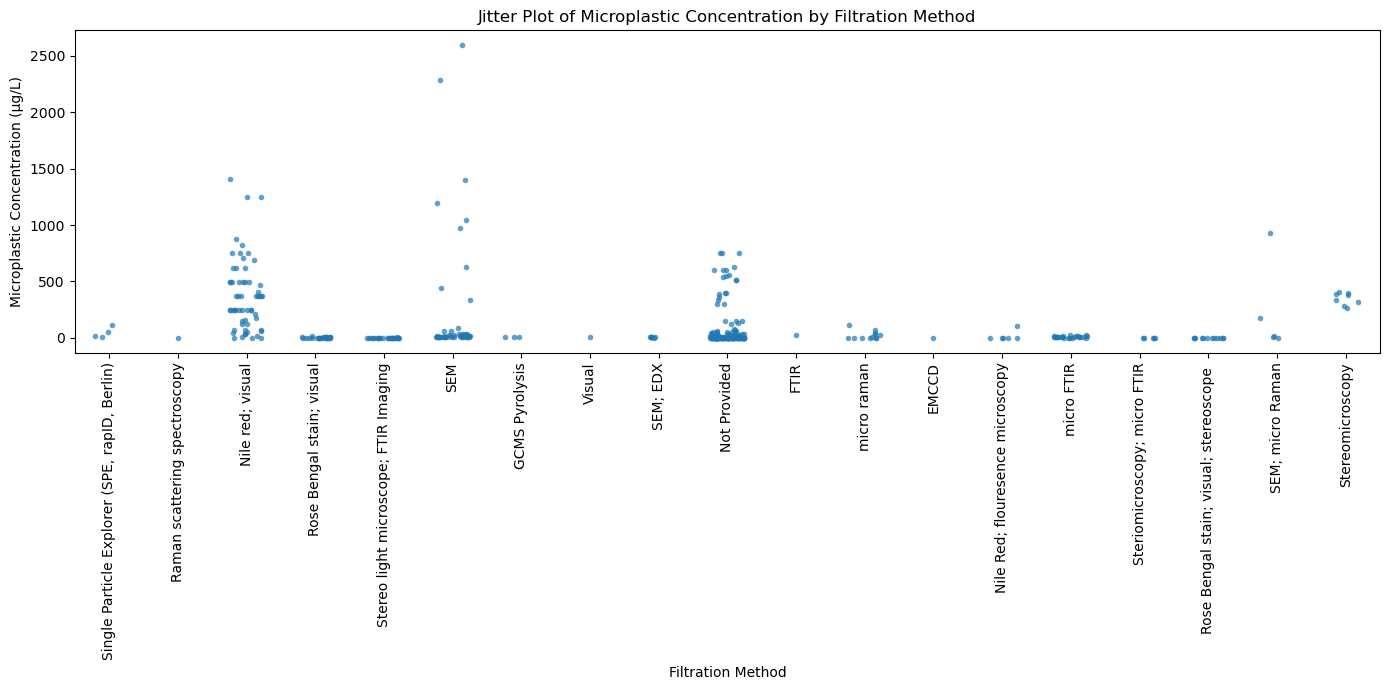

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Drop rows without filtration method info
df = df.dropna(subset=['Microplastic_Identification_Method'])

# Filter out extremely high concentrations to reduce skew (optional)
df = df[df['Concentration'] < df['Concentration'].quantile(0.99)]  # Keep bottom 99% only

# Plot
plt.figure(figsize=(14, 7))
sns.stripplot(data=df, x= 'Microplastic_Identification_Method', y='Concentration', jitter=0.25, size=4, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Filtration Method")
plt.ylabel("Microplastic Concentration (µg/L)")
plt.title("Jitter Plot of Microplastic Concentration by Filtration Method")
plt.tight_layout()
plt.show()

 ### Proportion of Effective vs. Ineffective Filters by Country

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_3705/651377768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Effectiveness'] = df_filtered['Concentration'].apply(


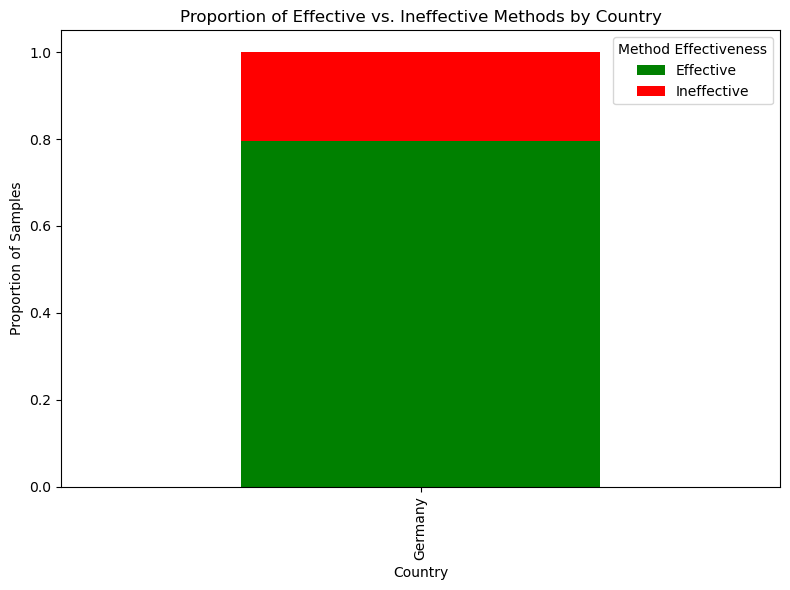

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration', 'Countries', 'Microplastic_Identification_Method'])

# Filter for Germany and USA
df_filtered = df[df['Countries'].isin(['Germany', 'United States'])]

# Define effectiveness: samples under 10 particles/L are "Effective"
threshold = 10
df_filtered['Effectiveness'] = df_filtered['Concentration'].apply(
    lambda x: 'Effective' if x < threshold else 'Ineffective'
)

# Group by country and effectiveness
summary = df_filtered.groupby(['Countries', 'Effectiveness']).size().unstack(fill_value=0)

# Convert to proportions
summary_prop = summary.div(summary.sum(axis=1), axis=0)

# Plot
summary_prop.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Proportion of Effective vs. Ineffective Methods by Country')
plt.ylabel('Proportion of Samples')
plt.xlabel('Country')
plt.legend(title='Method Effectiveness')
plt.tight_layout()
plt.show()